In [111]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [131]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [143]:
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        overall_mean = np.mean(X, axis=0)
        classes = np.unique(y)
        #initialize the within scatter matrix
        SW = np.zeros((n_features, n_features))
        #initialize the between scatter matrix 
        SB = np.zeros((n_features, n_features))
        
        for _class in classes:
            #find all the members to a particular class
            X_c = X[y==_class]
            #solve for the mean of the features of this paticular class 
            mean_c = np.mean(X_c, axis=0)
            Xc_minus_mean = X_c - mean_c

            SW += Xc_minus_mean.T.dot(Xc_minus_mean)

            #the number of members in this class
            n_c = X_c.shape[0]
            #overall mean subtracted from the class mean 
            mean_diff =(mean_c - overall_mean).reshape(-1,1)
            SB += n_c * mean_diff.dot(mean_diff.T)
        
        A = np.linalg.inv(SW).dot(SB)
        eig_values, eig_vectors = np.linalg.eig(A)
        #making sure that each eig vector is row in the matrix for easier indexing hence the transpose
        #not that the eig function returns them as column
        eig_vectors = eig_vectors.T
        idxs = np.argsort(abs(eig_values))[::-1] #the idx in decreasing order 
        eig_values_sorted = eig_values[idxs]
        eig_vectors_sorted = eig_vectors[idxs]

        self.linear_discriminants = eig_vectors_sorted[0:self.n_components]

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)   
        

In [144]:
lda = LDA(2)
lda.fit(X, y)
pred = lda.transform(X)

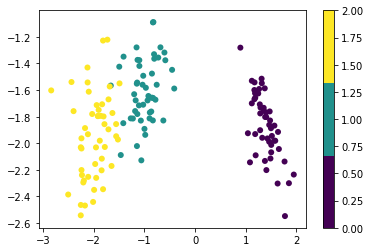

In [145]:
plt.scatter(pred[:,0], pred[:,1], c=y, edgecolors='none',cmap=plt.cm.get_cmap('viridis',3))
plt.colorbar()